USED BIKE PRICE ANALYSIS AND FEATURE ENGINEERING


This project explores the factors that influence the resale price of used bikes in India. By cleaning and transforming the data, we uncover trends related to bike age, brand, mileage, engine power, and ownership history. The goal is to understand what truly drives bike prices and to prepare the data for accurate predictions using machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")



In [2]:
# =======<<<<<< Load Dataset >>>>>>=======
df = pd.read_excel("bikes.xlsx")

# Preview data
print("Initial data shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())


Initial data shape: (7857, 8)
Columns: ['model_name', 'model_year', 'kms_driven', 'owner', 'location', 'mileage', 'power', 'price']
                         model_name  model_year      kms_driven        owner  \
0     Bajaj Avenger Cruise 220 2017        2017        17000 Km  first owner   
1  Royal Enfield Classic 350cc 2016        2016        50000 Km  first owner   
2               Hyosung GT250R 2012        2012        14795 Km  first owner   
3        Bajaj Dominar 400 ABS 2017        2017  Mileage 28 Kms  first owner   
4             Jawa Perak 330cc 2020        2020         2000 Km  first owner   

      location       mileage      power   price  
0    hyderabad  \n\n 35 kmpl     19 bhp   63500  
1    hyderabad  \n\n 35 kmpl  19.80 bhp  115000  
2    hyderabad  \n\n 30 kmpl     28 bhp  300000  
3  pondicherry   \n\n 28 Kms  34.50 bhp  100000  
4    bangalore         \n\n      30 bhp  197500  


In [3]:
# =======<<<<<< Data Cleaning and Preprocessing >>>>>>=======

# Strip and normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Clean 'kms_driven'
df['kms_driven'] = df['kms_driven'].astype(str) \
    .str.replace(r'[^\d]', '', regex=True) \
    .replace('', np.nan) \
    .astype(float)

# Clean 'mileage'
df['mileage'] = df['mileage'].astype(str).str.extract(r'(\d+\.?\d*)')
df['mileage'] = df['mileage'].astype(float)

# Clean 'power'
df['power'] = df['power'].astype(str).str.extract(r'(\d+\.?\d*)')
df['power'] = df['power'].astype(float)

# Convert 'price' to numeric
df['price'] = df['price'].astype(str).str.replace(',', '').astype(float)

# Extract brand from model_name
df['brand'] = df['model_name'].apply(lambda x: x.split()[0] if isinstance(x, str) else np.nan)

# Calculate age
df['age'] = 2025 - df['model_year']


# Encode owner as category
df['owner'] = df['owner'].astype(str).str.lower().str.strip()
df['owner'] = df['owner'].astype('category').cat.codes

# Drop rows with missing important values
df.dropna(subset=['price', 'power', 'mileage', 'kms_driven', 'age'], inplace=True)

# Final cleaned summary
print("\nCleaned data shape:", df.shape)
print(df.describe())



Cleaned data shape: (7076, 10)
        model_year      kms_driven        owner      mileage        power  \
count  7076.000000     7076.000000  7076.000000  7076.000000  7076.000000   
mean   2015.098643    17359.667044     0.285331    44.793103    20.739149   
std       3.832964    27223.096498     0.730837    16.979499    15.109866   
min    1950.000000        0.000000     0.000000     5.000000     6.100000   
25%    2014.000000       70.000000     0.000000    35.000000    13.800000   
50%    2016.000000    11500.000000     0.000000    40.000000    19.000000   
75%    2018.000000    25000.000000     0.000000    57.000000    24.160000   
max    2021.000000  1000000.000000     3.000000   104.000000   197.300000   

              price          age  
count  7.076000e+03  7076.000000  
mean   1.024685e+05     9.901357  
std    1.329746e+05     3.832964  
min    0.000000e+00     4.000000  
25%    4.000000e+04     7.000000  
50%    7.000000e+04     9.000000  
75%    1.200000e+05    11.000

In [4]:
# =======<<<<<< Save Cleaned Dataset >>>>>>=======
df.to_csv("cleaned_bike_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_bike_data.csv'.")


Cleaned dataset saved as 'cleaned_bike_data.csv'.


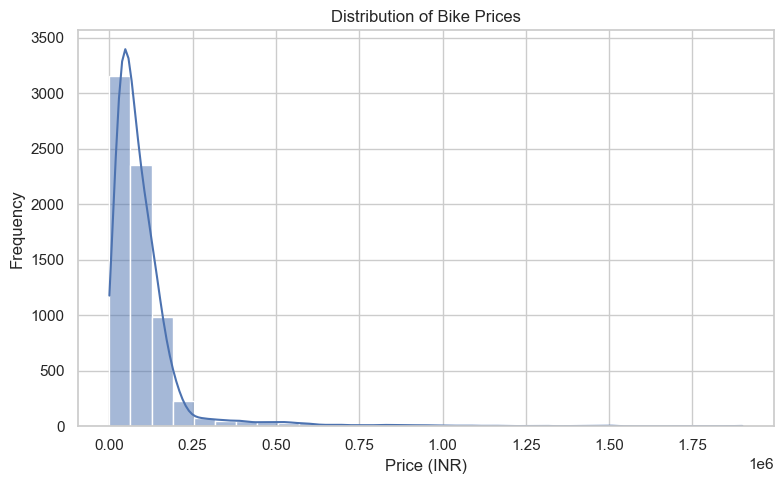

In [5]:
# 1. Distribution of Prices
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Bike Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



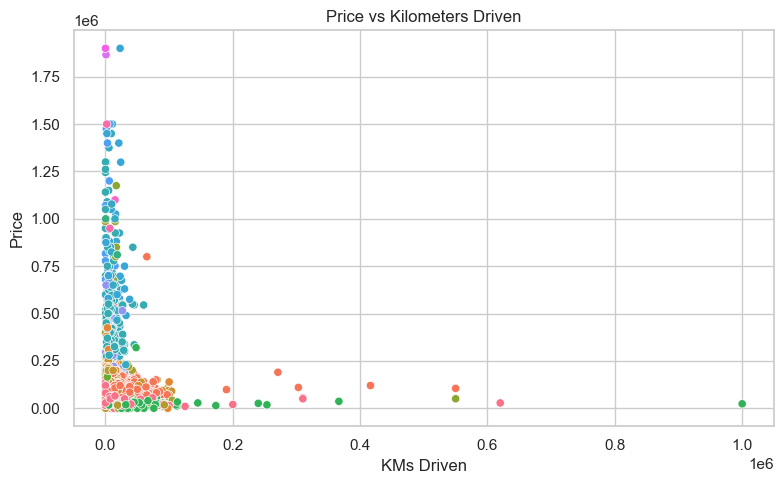

In [6]:
# 2. Scatter: Price vs KMs Driven
plt.figure(figsize=(8, 5))
sns.scatterplot(x='kms_driven', y='price', data=df, hue='brand', legend=False)
plt.title('Price vs Kilometers Driven')
plt.xlabel('KMs Driven')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


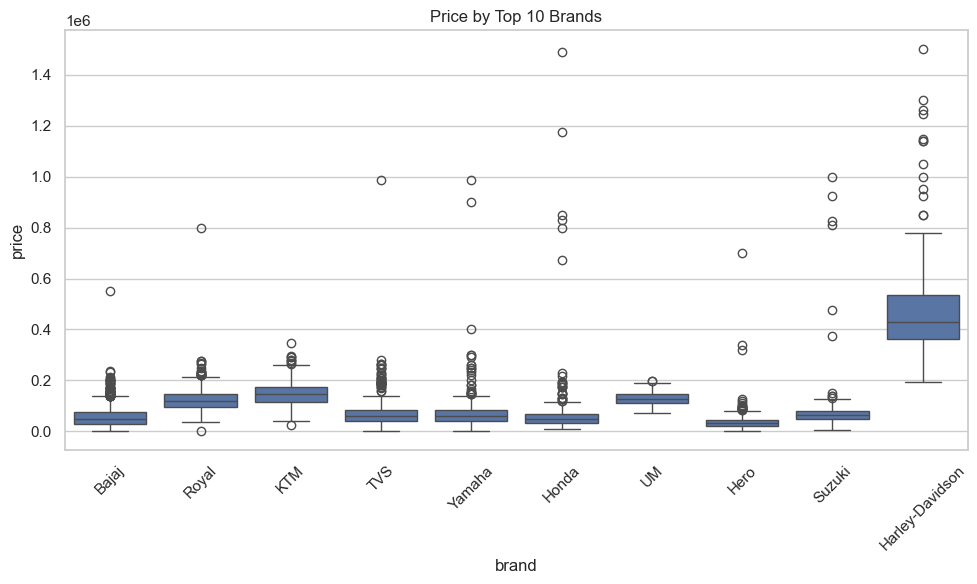

In [7]:
# 3. Boxplot: Price by Top 10 Brands
top_brands = df['brand'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 6))
sns.boxplot(x='brand', y='price', data=df[df['brand'].isin(top_brands)])
plt.title('Price by Top 10 Brands')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


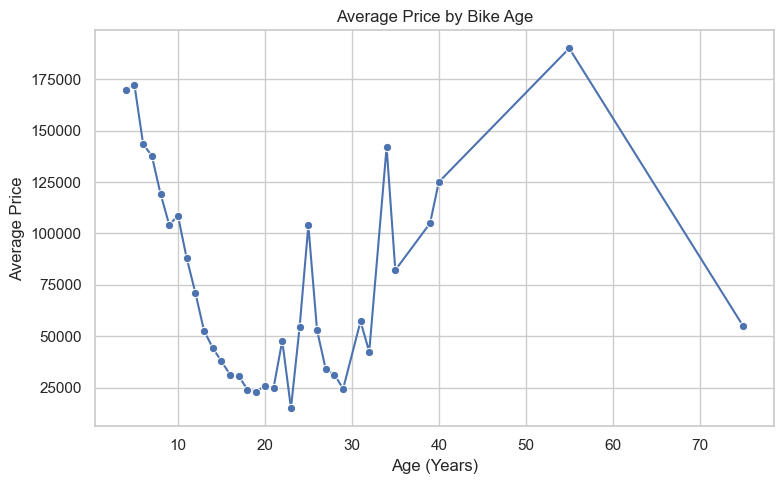

In [8]:
# 4. Line Plot: Average Price by Age
plt.figure(figsize=(8, 5))
sns.lineplot(data=df.groupby('age')['price'].mean().reset_index(), x='age', y='price', marker='o')
plt.title('Average Price by Bike Age')
plt.xlabel('Age (Years)')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()



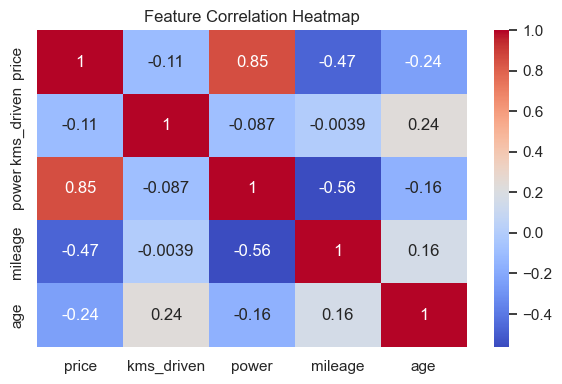

In [9]:
# 5. Heatmap: Correlation
plt.figure(figsize=(6, 4))
sns.heatmap(df[['price', 'kms_driven', 'power', 'mileage', 'age']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()